<a href="https://colab.research.google.com/github/pratik1208/HealthProPred/blob/main/NN_Frequency_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Doceree-HCP_Train.csv",encoding='latin-1')

In [ ]:
df.columns

Index(['ID', 'DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
       'USERCITY', 'USERZIPCODE', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE',
       'URL', 'KEYWORDS', 'TAXONOMY', 'IS_HCP'],
      dtype='object')

In [ ]:
df.shape

(113937, 14)

In [ ]:
df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [ ]:
df['KEYWORDS'] =df['KEYWORDS'].str.lower()

In [ ]:
# data = df[['DEVICETYPE','USERCITY','USERZIPCODE','USERAGENT','PLATFORMTYPE','URL','IS_HCP']].fillna(0)
# columns = data.columns

In [ ]:
data = df.copy()

In [ ]:
data.drop(["TAXONOMY","KEYWORDS","CHANNELTYPE","PLATFORMTYPE"], axis=1, inplace=True)


In [ ]:
data = data.fillna(0)

In [ ]:
test = data.sample(20000,random_state=42)
train = data[~data.index.isin(test.index)]

In [ ]:

train.columns[:-1]

Index(['ID', 'DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
       'USERCITY', 'USERZIPCODE', 'USERAGENT', 'URL'],
      dtype='object')

In [ ]:
encoder = {}
for col in train.columns[:-1]:
    encoder[col] = dict(train[col].value_counts())


In [ ]:
train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]
import numpy as np
def encode(data_frame,encoder):
    df_copy = data_frame.copy()
    for col in data_frame.columns:
        if col in encoder:
            df_copy[col] = df_copy[col].apply(
                lambda x: encoder[col][x]
                if x and (x is not np.nan) and (x in encoder[col]) else 0
            )
    return df_copy

In [ ]:
train_x.isna().sum()

ID                 0
DEVICETYPE         0
PLATFORM_ID        0
BIDREQUESTIP       0
USERPLATFORMUID    0
USERCITY           0
USERZIPCODE        0
USERAGENT          0
URL                0
dtype: int64

In [ ]:
encoded_train_x = encode(train_x,encoder)
encoded_test_x = encode(test_x,encoder)

In [ ]:
encoded_train_x

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,URL
0,1,64575,65243,22,9,371,42,4727,659
1,1,64575,65243,476,1,1218,1019,2720,552
2,1,64575,65243,10,1,10,10,2720,659
4,1,26491,17301,80,80,1408,101,1496,279
5,1,64575,17301,3,3,48,7,138,227
...,...,...,...,...,...,...,...,...,...
113932,1,64575,65243,1,1,976,30,355,369
113933,1,64575,65243,4,4,34,4,5,327
113934,1,64575,17301,1,1,0,62,3,1258
113935,1,26491,65243,2,1,193,14,1556,2


#**CountVectorizer**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf  = DecisionTreeClassifier()
clf.fit(encoded_train_x,train_y)

DecisionTreeClassifier()

In [ ]:
pred = clf.predict(encoded_test_x)

In [ ]:
importance = clf.feature_importances_
feature_names = train_x.columns

In [ ]:
importance

array([0.        , 0.0056239 , 0.11245101, 0.1104089 , 0.03936334,
       0.07450565, 0.06961464, 0.1574688 , 0.43056375])

In [ ]:
feature_names

Index(['ID', 'DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
       'USERCITY', 'USERZIPCODE', 'USERAGENT', 'URL'],
      dtype='object')

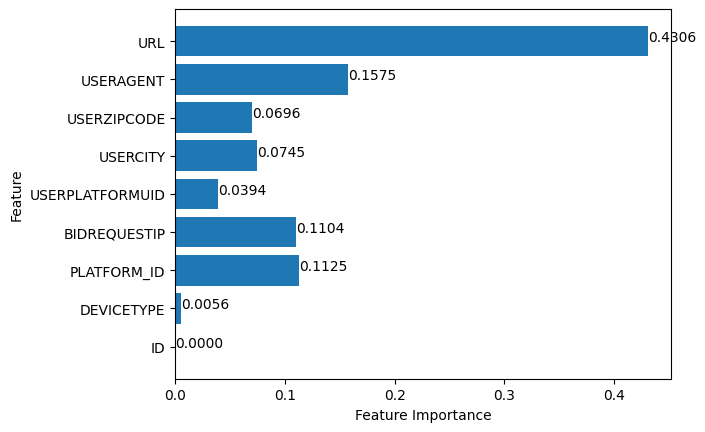

In [ ]:
import matplotlib.pyplot as plt
plt.barh(range(len(importance)), importance, align = 'center')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.yticks(range(len(importance)), feature_names)
for index, value in enumerate(importance):
    plt.text(value, index, f'{value:.4f}')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(encoded_train_x,train_y)
rf_pred = rf_clf.predict(encoded_test_x)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
f1_score(rf_pred,test_y,average = 'macro')

0.9590008217678441

In [ ]:
df

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,general|endocrine|false|medicine|surgery|urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,bone marrow|radiography|chronic|oncology|psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,general|endocrine|false|medicine|surgery|urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,dental|total|clinical|pharmacology|physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,critical care|emergency medicine|general pract...,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,114933,Desktop,2,68.82.97.126,051e4a06-4cb4-4b97-b0b1-d1c6a2b8e2c2,Philadelphia,19120.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/consultat...,cardiovascular|clinical|false|male|oncology|ps...,207RP1001X,1.0
113933,114934,Desktop,2,104.172.11.109,3289bba5-4a50-4b61-a5cc-68596bbdc2bf,Van Nuys,914014213.0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,asthma|arthritis|general|clinical|diagnosis|rh...,2084P0800X,1.0
113934,114935,Desktop,7,174.21.94.113,9c36e90c-caa7-4323-8431-fb84f8293972,NaN,98105.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/39455-whats-th...,rehabilitation|transplantation|clinical|preven...,208000000X,1.0
113935,114936,Mobile,2,69.253.129.131,afc27760-31f7-4f6e-aa08-90d8a96525d0,Wilmington,19808.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.dermatologyadvisor.com/home/topics...,pain|disease|autoimmune|multiple sclerosis|gra...,2084P0800X,1.0


In [ ]:
words = '|'.join(x.lower() for x in df.KEYWORDS.values).split('|')

In [ ]:
pd.Series(words).value_counts()

clinical                 108476
urology                  104346
cardiology               102202
dermatology               99296
oncology                  98668
                          ...  
strongyloidiasis              1
h1n1 vaccine                  1
rheumatoid factor             1
porphyrias                    1
mitral valve prolapse         1
Length: 1216, dtype: int64

In [ ]:
train_x = train_x.join(df.KEYWORDS,how = 'left')

In [ ]:
test_x = test_x.join(df.KEYWORDS,how='left')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary = True,max_features = 514)
vectorizer.fit(train_x.KEYWORDS)

CountVectorizer(binary=True, max_features=514)

In [ ]:
train_x_sparse_matrix = vectorizer.transform(train_x.KEYWORDS)
test_x_sparse_matrix = vectorizer.transform(test_x.KEYWORDS)

In [ ]:
df_transformed_train_x = pd.DataFrame.sparse.from_spmatrix(train_x_sparse_matrix, columns=vectorizer.get_feature_names_out(), index=train_x.index)
df_transformed_test_x = pd.DataFrame.sparse.from_spmatrix(test_x_sparse_matrix, columns=vectorizer.get_feature_names_out(), index=test_x.index)


In [ ]:
encoded_test_x = encoded_test_x.join(df_transformed_test_x,how='left')

In [ ]:
encoded_train_x = encoded_train_x.join(df_transformed_train_x, how = 'left')

In [ ]:
encoded_test_x.shape

(20000, 523)

In [ ]:
clf_keywords = RandomForestClassifier()
clf_keywords.fit(encoded_train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier()

In [ ]:
pred_test = clf_keywords.predict(encoded_test_x)
pred_train = clf_keywords.predict(encoded_train_x)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
f1_score(pred_test,test_y,average = 'macro'),f1_score(pred_train,train_y,average = 'macro')

(0.9962483912632787, 1.0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_test,test_y)

0.99685

#**Neural Network**

In [ ]:
encoded_train_x.shape

(93937, 9)

In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(0)


class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.ll = nn.Linear(9,10)
    self.ll2 = nn.Linear(10,10)
    self.ll3 = nn.Linear(10,6)
    self.ll4 = nn.Linear(6,6)
    self.ll5 = nn.Linear(6,4)
    self.ll6 = nn.Linear(4,2)
    self.ll7 = nn.Linear(2,1)

  def forward(self,x):
    x =  self.ll(x)
    x = torch.relu(x)
    x =  self.ll2(x)
    x = torch.relu(x)
    x =  self.ll3(x)
    x = torch.relu(x)
    x =  self.ll4(x)
    x = torch.relu(x)
    x =  self.ll5(x)
    x = torch.relu(x)
    x =  self.ll6(x)
    x = torch.relu(x)
    x =  self.ll7(x)
    x = torch.sigmoid(x)
    return x




In [ ]:
neuralnet = NeuralNetwork()

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Sample data
features = encoded_train_x  # 100 samples, 5 features
targets = train_y   # Corresponding targets for each sample

# Define a custom dataset class
class MyDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.targets[index]

# Create an instance of the dataset
my_dataset = MyDataset(features, targets)

# Define a dataloader for the dataset
batch_size = 32
shuffle = True

my_dataloader = DataLoader(dataset=my_dataset, batch_size=batch_size, shuffle=shuffle)

# Iterate through the dataloader



In [ ]:
def evaluate(Dataloader, model):
  real, pred = [],[]


In [ ]:
epochs =2
loss = nn.BCELoss()
optimizer = torch.optim.Adam(lr.parameters(), lr=0.01)
for i in range(epochs):
  for batch in my_dataloader:
    batch_features, batch_targets = batch
      pred = neuralnet(batch_features)

      l = loss(y, pred)
      l.backward()

      optimizer.step()
      optimizer.zero_grad()
